<a href="https://colab.research.google.com/github/7430souvik/souvik/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import  pandas as pd


In [2]:
# read in the housing_price dataset
housing_price = pd.read_csv("Housing.csv")
housing_price


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
# Lets try one hot encode our dataframe so its all numbers

housing_price_one_hot =pd.get_dummies(housing_price)
housing_price_one_hot= housing_price_one_hot.astype(int)
housing_price_one_hot.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,...,1,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,0,1,1,0,...,1,1,0,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,0,1,0,1,...,1,1,0,0,1,1,0,1,0,0


In [8]:
# create x & y values (features and labels)

x= housing_price_one_hot.drop("price",axis=1)
y= housing_price_one_hot["price"]

In [9]:
#  view x
x.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0
1,8960,4,4,4,3,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0
2,9960,3,2,2,2,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0
3,7500,4,2,2,3,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0
4,7420,4,1,2,2,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0


In [10]:
# view y
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [11]:
# create a training and test dataset

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

len(x), len(x_train),len(x_test)

(545, 436, 109)

In [12]:
x_train

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
46,6000,3,2,4,1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0
93,7200,3,2,1,3,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0
335,3816,2,1,1,2,0,1,1,0,0,1,1,0,0,1,1,0,1,0,0
412,2610,3,1,2,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1
471,3750,3,1,2,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,6000,4,2,4,0,0,1,1,0,1,0,1,0,0,1,1,0,0,0,1
106,5450,4,2,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,0
270,4500,3,2,3,1,0,1,1,0,1,0,0,1,1,0,1,0,1,0,0
435,4040,2,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1


In [15]:
# Build a neural network

#set randomm seed
tf.random.set_seed(42)

# 1. create a model
housing_price_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. compile the model
housing_price_model.compile(loss=tf.keras.losses.mae,
                            optimizer=tf.keras.optimizers.Adam(),
                            metrics=["mae"])

# 3. Fit the model
housing_price_model.fit(x_train,y_train,epochs=500)

Epoch 1/500
14/14 [==============================] - 1s 2ms/step - loss: 4705849.0000 - mae: 4705849.0000
Epoch 2/500
14/14 [==============================] - 0s 3ms/step - loss: 4702284.5000 - mae: 4702284.5000
Epoch 3/500
14/14 [==============================] - 0s 2ms/step - loss: 4698047.5000 - mae: 4698047.5000
Epoch 4/500
14/14 [==============================] - 0s 2ms/step - loss: 4692643.5000 - mae: 4692643.5000
Epoch 5/500
14/14 [==============================] - 0s 2ms/step - loss: 4685399.0000 - mae: 4685399.0000
Epoch 6/500
14/14 [==============================] - 0s 2ms/step - loss: 4675758.5000 - mae: 4675758.5000
Epoch 7/500
14/14 [==============================] - 0s 2ms/step - loss: 4663054.5000 - mae: 4663054.5000
Epoch 8/500
14/14 [==============================] - 0s 2ms/step - loss: 4646490.0000 - mae: 4646490.0000
Epoch 9/500
14/14 [==============================] - 0s 2ms/step - loss: 4625446.5000 - mae: 4625446.5000
Epoch 10/500
14/14 [==========================

In [30]:
x_test

<tf.Tensor: shape=(109, 20), dtype=int64, numpy=
array([[5900,    4,    2, ...,    0,    0,    1],
       [6500,    3,    2, ...,    1,    0,    0],
       [4040,    2,    1, ...,    0,    1,    0],
       ...,
       [6000,    4,    2, ...,    0,    1,    0],
       [6000,    3,    2, ...,    0,    1,    0],
       [6100,    3,    2, ...,    1,    0,    0]])>

In [16]:
# Evaluate our third model
housing_price_model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 1518185.5000 - mae: 1518185.5000


[1518185.5, 1518185.5]

In [18]:
# make some predictions
y_pred= housing_price_model.predict(x_test)
y_pred

4/4 [==============================] - 0s 3ms/step


array([[ 5236050. ],
       [ 5767882. ],
       [ 3589822. ],
       [ 4443096.5],
       [ 3526178.2],
       [ 5932240. ],
       [ 7521813. ],
       [ 4445576.5],
       [ 2883487.8],
       [ 2421727. ],
       [ 7609938.5],
       [ 3491384. ],
       [ 3303713.5],
       [ 2779320. ],
       [ 3537075.5],
       [ 3244253.5],
       [ 1812751.5],
       [ 5315017. ],
       [ 5184023. ],
       [ 5303149.5],
       [ 4467886. ],
       [ 6033717.5],
       [ 3242252. ],
       [ 3390962.5],
       [ 7288665.5],
       [ 8792665. ],
       [ 2754391. ],
       [ 2699837.8],
       [11622267. ],
       [ 2687704.5],
       [ 3578068.8],
       [ 2795051. ],
       [ 5328340. ],
       [ 5852421.5],
       [ 4243695. ],
       [ 4102853. ],
       [ 4139115.5],
       [ 2854403.5],
       [ 3099400. ],
       [ 2518338.8],
       [ 7046545. ],
       [ 3228066. ],
       [ 5697949.5],
       [ 3745714.5],
       [ 5958760. ],
       [ 5202819. ],
       [ 5335487. ],
       [ 4135

In [26]:
# Lets create a plotting function
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(range(len(train_data)),train_labels,c="b",label="Training data")
  plt.scatter(range(len(test_data)),test_labels,c="g",label="Testing data")
  plt.scatter(range(len(test_data)),predictions,c="r",label="Predictions")
  plt.legend()
  plt.show()


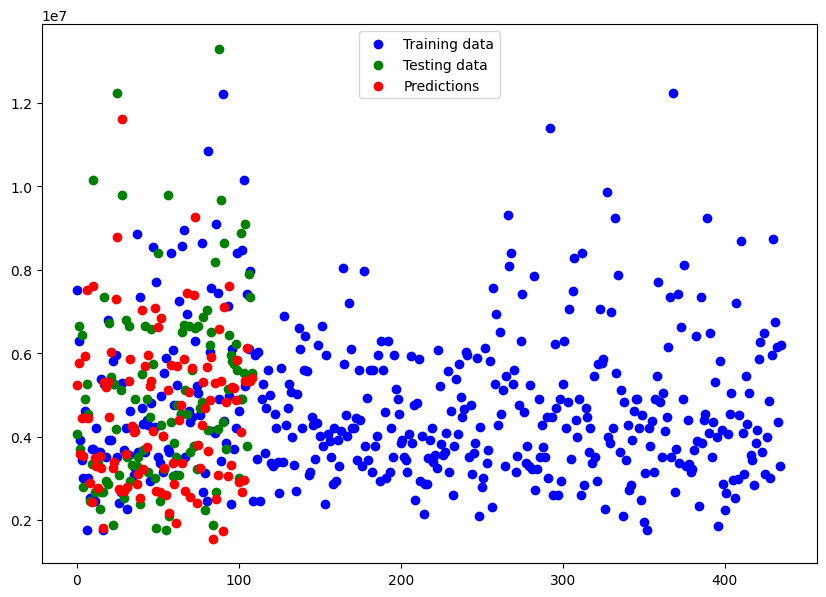

In [27]:
plot_predictions()